# Sea Level Temperature Analysis


### Step 1: Call in Data

Here, we call in all sea level temperatures since 1940 (on the 15th of each month) for ensemble mean points across the Caribbean and Gulf of Mexico.  We then find the mean temperature of this region.

In [40]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import polars as pl

In [ ]:

sst_ds = xr.open_dataset("../.data/data_stream-enda_stepType-instant.nc").drop_vars(['expver','number'])
# dataset = "reanalysis-era5-single-levels"
# request = {
#     "product_type": ["ensemble_mean"],
#     "variable": ["sea_surface_temperature"],
#     "year": [
#         "1940", "1941", "1942",
#         "1943", "1944", "1945",
#         "1946", "1947", "1948",
#         "1949", "1950", "1951",
#         "1952", "1953", "1954",
#         "1955", "1956", "1957",
#         "1958", "1959", "1960",
#         "1961", "1962", "1963",
#         "1964", "1965", "1966",
#         "1967", "1968", "1969",
#         "1970", "1971", "1972",
#         "1973", "1974", "1975",
#         "1976", "1977", "1978",
#         "1979", "1980", "1981",
#         "1982", "1983", "1984",
#         "1985", "1986", "1987",
#         "1988", "1989", "1990",
#         "1991", "1992", "1993",
#         "1994", "1995", "1996",
#         "1997", "1998", "1999",
#         "2000", "2001", "2002",
#         "2003", "2004", "2005",
#         "2006", "2007", "2008",
#         "2009", "2010", "2011",
#         "2012", "2013", "2014",
#         "2015", "2016", "2017",
#         "2018", "2019", "2020",
#         "2021", "2022", "2023",
#         "2024", "2025"
#     ],
#     "month": [
#         "01", "02", "03",
#         "04", "05", "06",
#         "07", "08", "09",
#         "10", "11", "12"
#     ],
#     "day": ["15"],
#     "time": ["00:00"],
#     "data_format": "netcdf",
#     "download_format": "zip",
#     "area": [25, -100, 5, -55]
# }



### Step 2: Transform Data

Want to add year, month to data and to convert SST to Celsius

In [71]:

mean_sst = (
    pl.DataFrame(sst_ds.mean(dim=['latitude','longitude']).to_pandas().reset_index())
    .with_columns(
        pl.col('valid_time').dt.year().alias('year'),
        pl.col('valid_time').dt.month().alias('month'),
        (pl.col('sst') - 273.15).alias('sst')
    )
)

In [72]:
mean_sst

valid_time,sst,year,month
datetime[ns],f32,i32,i8
1940-01-15 00:00:00,26.416473,1940,1
1940-02-15 00:00:00,25.762146,1940,2
1940-03-15 00:00:00,26.161133,1940,3
1940-04-15 00:00:00,26.923157,1940,4
1940-05-15 00:00:00,27.529419,1940,5
…,…,…,…
2025-07-15 00:00:00,28.715576,2025,7
2025-08-15 00:00:00,29.273987,2025,8
2025-09-15 00:00:00,29.534851,2025,9


### Step 2: Analyze SST Data

Look at graphs to see if data looks reasonable

Text(0.5, 1.0, 'August Caribbean and Gulf SST Over Time')

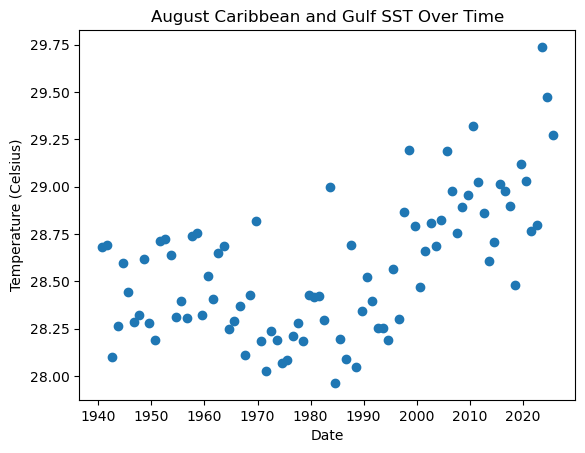

In [73]:
plt.scatter(mean_sst.filter(pl.col('month') == 8)['valid_time'], mean_sst.filter(pl.col('month') == 8)['sst'])
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.title('August Caribbean and Gulf SST Over Time')

Text(0.5, 1.0, 'Caribbean and Gulf SST Over Time')

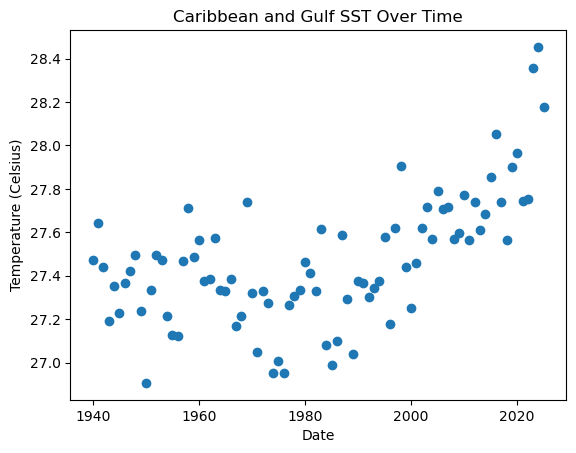

In [74]:
year_mean_sst = mean_sst.group_by('year').agg(pl.mean('sst'))
plt.scatter(year_mean_sst['year'], year_mean_sst['sst'])
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.title('Caribbean and Gulf SST Over Time')

### Step 3: Write Out Parquet File

In [75]:
mean_sst.write_parquet('../.data/sst.parquet')